<a href="https://colab.research.google.com/github/fajarwr/CNN_3D_Permaebility/blob/master/CNN_3D_Permeability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import division, print_function, absolute_import
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten, Conv3D, MaxPooling3D, BatchNormalization, Input
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, TensorBoard
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
import os
import sys
import matplotlib.pyplot as plt
import re
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.callbacks import ModelCheckpoint
import keras

Using TensorFlow backend.


In [0]:
#Define r square matric
def r2_keras(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [3]:
cd

/root


In [4]:
cd /content

/content


In [5]:
pwd

'/content'

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
ls

CNN_Permeability/  gdrive/  sample_data/


In [0]:
os.chdir('gdrive/My Drive/CNN_Permeability/001_PythonCodes/CNN_3D_Permaebility')

In [0]:
#Import datagenerator taken from 
#https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly
from DataGenerator_3D_Classes import DataGenerator

In [0]:
#Experiment number
exp_num = 3
os.chdir('../../005_Result/CNN_3D_v2')
#if any('00'+str(exp_num) in s for s in os.listdir(os.getcwd())):
    #sys.exit('Alert : There is already 00'+str(exp_num)+' experiment result!!')

In [0]:
#Load the data
dim1,dim2,dim3,chn = 100,100,100,1
training_len = 90
testing_len = 10
total_len = training_len + testing_len
phi = []
ssa = []
os.chdir('../../002_Data/Berea_Sandstone_npy')
for image3D_npy in os.listdir(os.getcwd())[:total_len]:
    phi.append([float(s) for s in re.findall('[-+]?\d*\.\d+|\d+',
                image3D_npy)][1])
    ssa.append([float(s) for s in re.findall('[-+]?\d*\.\d+|\d+',
                image3D_npy)][2])
k = np.power(1-np.array(phi), 3)/np.power(ssa, 2)
k_norm = k/np.max(k)

In [0]:
# Parameters
params = {'dim': (dim1,dim2,dim3),
          'batch_size': 20,
          'n_classes': 1,
          'n_channels': chn,
          'shuffle': False}

In [0]:
#Datasets
partition = {
		'train': os.listdir(os.getcwd())[:training_len],
		'validation': os.listdir(os.getcwd())[training_len:total_len],
        'total' : os.listdir(os.getcwd())[:total_len]
		}
labels = dict(zip(os.listdir(os.getcwd())[:total_len], k_norm))

In [0]:
# Generators
training_generator = DataGenerator(partition['train'], labels, **params)
validation_generator = DataGenerator(partition['validation'], labels, **params)
total_generator = DataGenerator(partition['total'], labels, **params)

In [15]:
#Define a model
model = Sequential()
model.add(Conv3D(32, kernel_size=5, strides=(2, 2, 2), padding='valid',
                 data_format='channels_last', dilation_rate=(1, 1, 1),
                 activation='relu', use_bias=True,
                 kernel_initializer=keras.initializers.glorot_uniform(seed=0), bias_initializer='zeros',
                 kernel_regularizer=None, bias_regularizer=None, 
                 activity_regularizer=None, kernel_constraint=None,
                 bias_constraint=None, input_shape=(dim1, dim2, dim3, chn)))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 1, 1), padding='valid',
                       data_format='channels_last'))
model.add(Conv3D(32, kernel_size=3, strides=(1, 1, 1), padding='valid',
                 data_format='channels_last', dilation_rate=(1, 1, 1),
                 activation='relu', use_bias=True,
                 kernel_initializer=keras.initializers.glorot_uniform(seed=0), bias_initializer='zeros',
                 kernel_regularizer=None, bias_regularizer=None, 
                 activity_regularizer=None, kernel_constraint=None,
                 bias_constraint=None))
model.add(Conv3D(32, kernel_size=3, strides=(1, 1, 1), padding='valid',
                 data_format='channels_last', dilation_rate=(1, 1, 1),
                 activation='relu', use_bias=True,
                 kernel_initializer=keras.initializers.glorot_uniform(seed=0), bias_initializer='zeros',
                 kernel_regularizer=None, bias_regularizer=None, 
                 activity_regularizer=None, kernel_constraint=None,
                 bias_constraint=None))
model.add(MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 1, 1), padding='valid',
                       data_format='channels_last'))
model.add(Flatten(data_format='channels_last'))
model.add(Dense(128, activation='relu', use_bias=True,
                kernel_initializer=keras.initializers.glorot_uniform(seed=0), bias_initializer='zeros',
                kernel_regularizer=None, bias_regularizer=None,
                activity_regularizer=None, kernel_constraint=None,
                bias_constraint=None))
model.add(Dense(64, activation='relu', use_bias=True,
                kernel_initializer=keras.initializers.glorot_uniform(seed=0), bias_initializer='zeros',
                kernel_regularizer=None, bias_regularizer=None,
                activity_regularizer=None, kernel_constraint=None,
                bias_constraint=None))
model.add(Dense(1, activation=None, use_bias=True,
                kernel_initializer=keras.initializers.glorot_uniform(seed=0), bias_initializer='zeros',
                kernel_regularizer=None, bias_regularizer=None,
                activity_regularizer=None, kernel_constraint=None,
                bias_constraint=None))


Instructions for updating:
Colocations handled automatically by placer.


In [16]:
pwd

'/content/gdrive/My Drive/CNN_Permeability/002_Data/Berea_Sandstone_npy'

In [0]:
#Compile the model
model.compile(optimizer='Adam', loss='mean_squared_error', metrics=[r2_keras],
              loss_weights=None, sample_weight_mode=None,weighted_metrics=None,
              target_tensors=None)

In [0]:
#This checkpoint object will store the model parameters in the file "weights.hdf5"
#checkpoint = ModelCheckpoint(filepath='../../../../../Weights_CNN3D_00'+str(exp_num)+'.hdf5', monitor='val_loss')

In [0]:
#Change to data directory
os.chdir('../../002_Data/Berea_Sandstone_npy')

In [20]:
# Train model on dataset
history = model.fit_generator(generator=training_generator, epochs=20,
                    workers=1, use_multiprocessing=False)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
4/4 [==============================] - 17s 4s/step - loss: 1140834.8263 - r2_keras: -31417920.5259
Epoch 2/20
4/4 [==============================] - 3s 731ms/step - loss: 25.5350 - r2_keras: -616.4896
Epoch 3/20
4/4 [==============================] - 3s 731ms/step - loss: 12.3622 - r2_keras: -423.4414
Epoch 4/20
4/4 [==============================] - 3s 714ms/step - loss: 0.3593 - r2_keras: -9.5231
Epoch 5/20
4/4 [==============================] - 3s 719ms/step - loss: 7.0423 - r2_keras: -235.4725
Epoch 6/20
4/4 [==============================] - 3s 726ms/step - loss: 0.7055 - r2_keras: -16.8653
Epoch 7/20
4/4 [==============================] - 3s 727ms/step - loss: 0.4057 - r2_keras: -11.0635
Epoch 8/20
4/4 [==============================] - 3s 728ms/step - loss: 0.4304 - r2_keras: -11.7464
Epoch 9/20
4/4 [==============================] - 3s 732ms/step - loss: 0.4338 - r2_keras: -11.8510
Epoch 10/20
4/4 [=====================

In [0]:
#Save history
history_df = pd.DataFrame.from_dict(history.history)
history_df.to_excel('../../005_Result/CNN_3D_v2/History_CNN3D_00'+str(exp_num)+'.xlsx')

In [0]:
#Load the model and plot the data
#model.load_weights('../../../../../Weights_CNN3D_00'+str(exp_num)+'.hdf5')

In [0]:
#Store the training & testing result
total_result = model.predict_generator(generator=total_generator, steps=None,
                                  max_queue_size=10, workers=1,
                                  use_multiprocessing=False, verbose=0)

In [24]:
len(total_result)

100

In [0]:
#Save result
training_result = {
		'true_training': np.reshape(k_norm[:training_len]*np.max(k),(training_len,)),
		'pred_training': np.reshape(total_result[:training_len]*np.max(k),(training_len,))
		}
testing_result = {
    'true_testing': np.reshape(k_norm[training_len:total_len]*np.max(k),(testing_len,)),
		'pred_testing': np.reshape(total_result[training_len:total_len]*np.max(k),(testing_len,))
        }
training_result_df = pd.DataFrame.from_dict(training_result)
testing_result_df = pd.DataFrame.from_dict(testing_result)
training_result_df.to_excel('../../005_Result/CNN_3D_v2/Training_CNN3D_00'+
                            str(exp_num)+'_'+str(r2_score (k_norm[:training_len]*np.max(k), total_result[:training_len]*np.max(k))*100)+'.xlsx')
testing_result_df.to_excel('../../005_Result/CNN_3D_v2/Testing_CNN3D_00'+
                            str(exp_num)+'_'+str(r2_score(k_norm[training_len:total_len]*np.max(k), total_result[training_len:total_len]*np.max(k))*100)+'.xlsx')


In [26]:
str(r2_score(k_norm[:training_len]*np.max(k), total_result[:training_len]*np.max(k))*100)

'-979.6445350660607'

Text(0.5, 1.0, 'Plot Error untuk Setiap Nilai Permeabilitas \n pada 20 Epoch Data Testing Arsitektur #3')

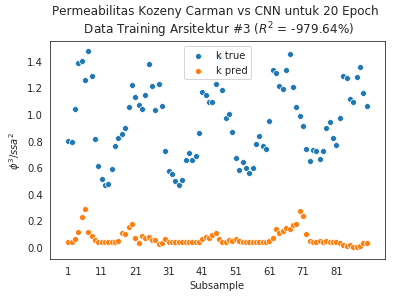

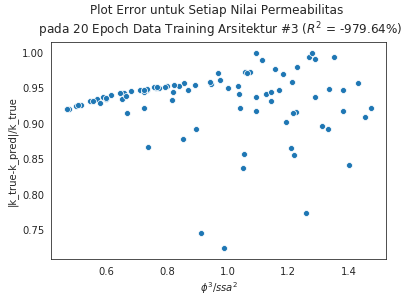

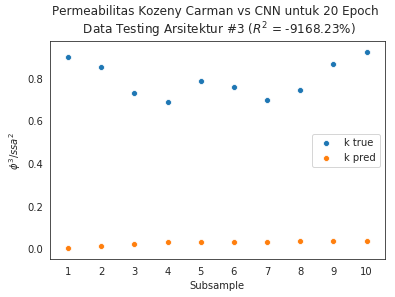

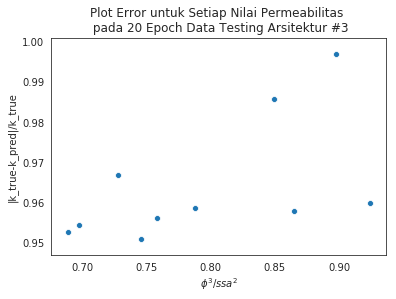

In [27]:
#Impport data
i = exp_num
Training = training_result_df
Error_training =np.abs(Training['true_training'].values-Training['pred_training'].values)/Training['true_training'].values
Training['Error'] = Error_training
Training.index.names = ['Subsample']
Testing = testing_result_df
Error_testing =np.abs(Testing['true_testing'].values-Testing['pred_testing'].values)/Testing['true_testing'].values
Testing['Error'] = Error_testing
Testing.index.names = ['Subsample']
    
#Plot training data
plt.figure()
sns.scatterplot(x=range(1,91), y='true_training', data = Training)
sns.scatterplot(x=range(1,91), y='pred_training', data = Training)
plt.ylabel('$\phi^3/ssa^2$')
plt.xlabel('Subsample')
plt.title('Permeabilitas Kozeny Carman vs CNN untuk 20 Epoch \n Data Training Arsitektur #{} ($R^2$ = {:2.2f}%)' .format(i, r2_score(Training['true_training'], Training['pred_training'])*100))
plt.legend(['k true', 'k pred'])
plt.xticks(np.arange(1,91,10))
    
#Plot error training data
plt.figure()
sns.scatterplot(x='true_training', y='Error', data = Training)
plt.ylabel('|k_true-k_pred|/k_true')
plt.xlabel('$\phi^3/ssa^2$')
plt.title('Plot Error untuk Setiap Nilai Permeabilitas \n pada 20 Epoch Data Training Arsitektur #{} ($R^2$ = {:2.2f}%)' .format(i, r2_score(Training['true_training'], Training['pred_training'])*100))

              
#Plot testing data
plt.figure()
sns.scatterplot(x=range(1,11), y='true_testing', data = Testing)
sns.scatterplot(x=range(1,11), y='pred_testing', data = Testing)
plt.ylabel('$\phi^3/ssa^2$')
plt.xlabel('Subsample')
plt.title('Permeabilitas Kozeny Carman vs CNN untuk 20 Epoch \n Data Testing Arsitektur #{} ($R^2$ = {:2.2f}%)' .format(i, r2_score(Testing['true_testing'], Testing['pred_testing'])*100))
plt.legend(['k true', 'k pred'])
plt.xticks(np.arange(1,11,1))
    
#Plot error testing data
plt.figure()
sns.scatterplot(x='true_testing', y='Error', data = Testing)
plt.ylabel('|k_true-k_pred|/k_true')
plt.xlabel('$\phi^3/ssa^2$')
plt.title('Plot Error untuk Setiap Nilai Permeabilitas \n pada 20 Epoch Data Testing Arsitektur #{}' .format(i))